In [19]:
%matplotlib inline
import sys
import os
import argparse
sys.path.append("../")
from utils.plot import *
from utils.load_data import *
from utils.paths import *
from utils.utils import *
from networks.networks import *
from keras.layers import Input
from keras.models import Model

In [2]:
# parser = argparse.ArgumentParser(description='Produce stats about an model')

# parser.add_argument('-n', '--net', metavar='', required=True,
#                     help='network architeture name')
# parser.add_argument('-w', '--weights', metavar='', default='',
#                    help='model weights file name')
# parser.add_argument('-o', '--output', metavar='', default='',
#                    help='output name')
# parser.add_argument('-t', '--train', metavar='', default='../data/csv/train_pairs.csv',
#                     help='train data csv file')
# parser.add_argument('-s', '--test', metavar='', default='../data/csv/test_pairs.csv',
#                     help='test data csv file')

# args = parser.parse_args()
# NETWORK_NAME = args.net
# OUTPUT_NAME = args.output
# TRAIN_CSV = args.train
# TEST_CSV = args.test
# WEIGHTS_FILE = args.weights

In [3]:
OUTPUT_PATH = "../stats/"

OUTPUT_PATH += 'alex_net'

WEIGHTS_FILE = os.path.join(WEIGHTS_DIR, "alex_net-w.h5")

In [4]:
# Load Data
print("Loading Data...")
([X1, X2], y), ([X1_test, X2_test], y_test) = load_data("../data/csv/train_pairs.csv", "../data/csv/test_pairs.csv")

Loading Data...


In [5]:
# Load Model
#######################################
print("Loading Model...")
network = base_network('alex_net')

network_input = Input([230, 105, 3])

model = network(network_input)

model = Model(network_input, model)

model.load_weights('../weights/alex_net-w.h5')
#######################################

Loading Model...


In [6]:
# Predict on training and testing data
print("Predicting Training Data...")
train_pred_x1 = model.predict(X1)
train_pred_x2 = model.predict(X2)

print("Predicting Testing Data...")
test_pred_x1 = model.predict(X1_test)
test_pred_x2 = model.predict(X2_test)

Predicting Training Data...
Predicting Testing Data...


In [12]:
y_pred = distance(train_pred_x1, train_pred_x2)

In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
mean_squared_error(y, y_pred)

0.40242926252044686

In [15]:
y_pred

array([ 0.,  0.,  0., ...,  0.,  0.,  0.], dtype=float32)

In [17]:
np.sum(np.sum(train_pred_x1, axis=1))

0.0

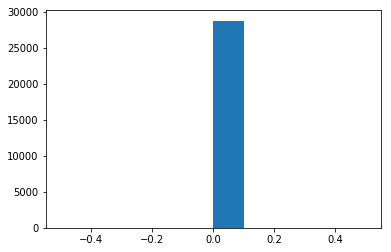

In [21]:
plt.hist(y_pred);